In [78]:
!pip install mplfinance

     ---------------------------------------- 75.0/75.0 kB 1.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [192]:
# imports
import pandas as pd
import yfinance as yf
import numpy as np
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler

In [193]:
def wwma(values, n):
    """
     J. Welles Wilder's EMA 
    """
    return values.ewm(alpha=1/n, adjust=False).mean()

def atr(df, n=14):
    data = df.copy()
    high = data["High"]
    low = data["Low"]
    close = data["Close"]
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = wwma(tr, n)
    return atr

In [224]:
## add dataset to the project
def load_stock_memory(name):
    path = f'../Data/{name}.csv'
    data = pd.read_csv(path, parse_dates=['Date'], index_col='Date') #index_col='Date'
    # data['Date'] = pd.to_datetime(data['Date'])

    data['Prev_Close'] = data.Close.shift(1)
    data = data.iloc[1:]
    return data
def load_stock_yfinance(name,start="2020-12-10", end="2024-02-01", interval="1d"):
    data = yf.download(name, start=start, end=end, interval=interval)
    return data
    
stock_data = load_stock_yfinance("DMART.NS")
# stock_data['atr'] = atr(stock_data,14)
stock_data['pct_change'] = stock_data['Close'].pct_change().rolling(7).mean() *100
stock_data = stock_data.iloc[7:]
stock_data = stock_data[stock_data['Volume'] != 0]
stock_data.head(20)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,pct_change
Date,,,,,,,
2020-12-21,2645.000000,2715.000000,2460.800049,2682.399902,2682.399902,1195766,0.344941
2020-12-22,2676.000000,2678.300049,2552.250000,2625.750000,2625.750000,744981,-0.300276
2020-12-23,2650.000000,2675.000000,2621.300049,2661.850098,2661.850098,374135,-0.033905
2020-12-24,2661.850098,2700.000000,2604.800049,2673.100098,2673.100098,432162,0.197026
2020-12-28,2685.949951,2698.949951,2655.000000,2678.000000,2678.000000,319378,0.293557
2020-12-29,2690.000000,2694.699951,2645.000000,2665.699951,2665.699951,345136,0.614036
2020-12-30,2666.199951,2725.000000,2642.350098,2680.300049,2680.300049,479318,0.239572
2020-12-31,2691.000000,2780.000000,2670.000000,2763.600098,2763.600098,984705,0.437878
2021-01-01,2767.000000,2804.100098,2747.000000,2789.100098,2789.100098,432860,0.871395


In [226]:
# getRelativeValues return the relative of High, Close, Low for a given index i and stock_data
def getRelativeValues(i, stock_data):
    # use the index i to get the High, Close, Low values
    high = stock_data.iloc[i]['High']
    close = stock_data.iloc[i]['Close']
    low = stock_data.iloc[i]['Low']
    op = stock_data.iloc[i]['Open']
    return high/op , close/op, low/op

# calculate relative midpoints based on index i and j 
def calculateMidpoints(i, j, k, stock_data):
    # get the relative values of High, Close, Low for index i and j
    # high_i, _, low_i = getRelativeValues(i, stock_data)
    # high_j, _, low_j = getRelativeValues(j, stock_data)
    # # calculate relative midpoints
    # mi = ((high_i - low_i) / 2) + low_i
    # mj = ((high_j - low_j) / 2) + low_j
    close_i = stock_data.iloc[i]['Close']
    high_i = stock_data.iloc[i]['High']
    low_i = stock_data.iloc[i]['Low']
    op_i = stock_data.iloc[i]['Open']
    close_j = stock_data.iloc[j]['Close']
    high_j = stock_data.iloc[j]['High']
    low_j = stock_data.iloc[j]['Low']
    op_j = stock_data.iloc[j]['Open']
    close_k = stock_data.iloc[k]['Close']
    high_k = stock_data.iloc[k]['High']
    low_k = stock_data.iloc[k]['Low']
    op_k = stock_data.iloc[k]['Open']
    
    # calculate the reference , that is minimum of all lows
    min_low = min(low_i, low_j, low_k)
    
    # high_i_rel = high_i / min_low
    # low_i_rel = low_i / min_low
    # high_j_rel = high_j / min_low
    # low_j_rel = low_j / min_low
    # high_k_rel = high_k / min_low
    # low_k_rel = low_k / min_low
    # open_i_rel = op_i / min_low
    # open_j_rel = op_j / min_low
    # open_k_rel = op_k / min_low
    # close_i_rel = close_i / min_low
    # close_j_rel = close_j / min_low
    # close_k_rel = close_k / min_low
    
    m1 = (((high_i - low_i) / 2) + (low_i-min_low)) / min_low
    m2 = (((high_j - low_j) / 2) + (low_j-min_low)) / min_low
    m3 = (((high_k - low_k) / 2) + (low_k-min_low)) / min_low
    
    m1_close = (((close_i - op_i) / 2) + (op_i-min_low) ) / min_low
    m2_close = (((close_j - op_j) / 2) + (op_j-min_low) ) / min_low
    m3_close = (((close_k - op_k) / 2) + (op_k-min_low) ) / min_low
    # return (high_i_rel, low_i_rel, high_j_rel, low_j_rel, high_k_rel, low_k_rel, open_i_rel, open_j_rel, open_k_rel, close_i_rel, close_j_rel, close_k_rel, m1, m2, m3,  m1_close, m2_close, m3_close )
    return ( m1, m2, m3,  m1_close, m2_close, m3_close)

# def get_candle_vector(i, n, stock_data):
#     if i + n - 1 >= len(stock_data):
#         # Check if there are enough data points for the specified range
#         print("Not enough data for the specified range.")
#         return None

#     candle_vector = []
    
#     # Define the columns of interest
#     price_columns = [ 'High', 'Low', 'Close']

#     for j in range(n):  # Iterate over the specified number of consecutive candles
#         candle = stock_data.iloc[i + j]

#         # Calculate relative changes from opening prices
#         open_price = candle['Open']
#         for col in price_columns:
#             relative_change = (candle[col] - open_price) / open_price
#             candle_vector.append(relative_change)

#     # Create a numpy array from the list
#     candle_vector = np.array(candle_vector)

#     return candle_vector


def get_candle_vector(i, n, stock_data):
    # Slice the DataFrame from i to i+n rows
    df = stock_data.iloc[i:i+n]

    df = df[["Open","Low","High","Close","Volume"]]

    # Take the natural logarithm of the "Volume" column
    df['Volume'] = np.log(df['Volume'])

    # Scale the DataFrame except the "Volume" column using MinMaxScaler
    scaler = MinMaxScaler()
    scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    # print(scaled_df)
    # Flatten the scaled DataFrame
    flattened_array = scaled_df.values.flatten()
    if len(flattened_array) != 15:
        print(df)
        print(flattened_array)
        print(i,n)

    return flattened_array




In [227]:
class StockPattern():
    def __init__(self, i, patt, dir):
        self.pattern = patt
        self.i = i
        self.dir = dir
    def __getitem__(self, index):
        return self.pattern[index]
    
    def __len__(self):
        return len(self.pattern)
    

In [228]:
# patt_index = {}
patterns = []

for i in range(len(stock_data)-7):
    up = False
    down = False
    threshold = stock_data.iloc[i+2]['pct_change']
    checkForUpTrend = True
    checkForDownTrend = True
    # check if any of the value of high in the range i+3 to i+6 is 3% greater than i+2 close value
    for j in range(i+3, i+6):
        lowerbound = stock_data.iloc[i+2]['Low'] - threshold
        bottom_gap = stock_data.iloc[i+3]['Open'] - lowerbound
        upperbound = stock_data.iloc[i+3]['Open'] + (bottom_gap * 1.5)
        if checkForUpTrend and stock_data.iloc[j]['Low'] <= lowerbound:
            checkForUpTrend = False
        elif checkForUpTrend and  stock_data.iloc[j]['High'] >= upperbound:
            up=True
            checkForUpTrend = False
            break
    for j in range(i+3, i+6):
        upperbound = stock_data.iloc[i+2]['High'] + threshold
        top_gap = upperbound - stock_data.iloc[i+3]['Open']
        lowerbound = stock_data.iloc[i+3]['Open'] - (top_gap * 1.5)
        if  checkForDownTrend and stock_data.iloc[j]['High'] >= upperbound:
            checkForDownTrend = False
        elif checkForDownTrend and stock_data.iloc[j]['Low'] <= lowerbound:
            down = True
            
            break
        
    if up and down :
        continue        
    if up or down:
        # cs_t_2 = getRelativeValues(i,stock_data)
        # cs_t_1 = getRelativeValues(i+1,stock_data)
        # cs_t = getRelativeValues(i+2,stock_data)
        # relative_features = calculateMidpoints(i,i+1,i+2,stock_data)
        trend = 1 if up else -1
        # if up :
            # patterns.append(StockPattern(i,np.array([*cs_t_2,*cs_t_1,*cs_t,*relative_features]),1))
            # patterns.append(StockPattern(i,np.array([*relative_features]),1))
            
        patterns.append(StockPattern(i,get_candle_vector(i,3,stock_data),trend))
        # if down:
        #     patterns.append(StockPattern(i,np.array([*cs_t_2,*cs_t_1,*cs_t,*relative_features]),-1))
            # patterns.append(StockPattern(i,np.array([*relative_features]),-1))
            
            
from collections import defaultdict
mp = defaultdict(int)
for pat in patterns:
    mp[pat.dir]+=1
    if len(pat.pattern)!=15:
        print(pat.pattern)
mp

defaultdict(int, {-1: 201, 1: 162})

In [229]:
stock_data.iloc[624:627]

,Open,High,Low,Close,Adj Close,Volume,pct_change
Date,,,,,,,
2023-06-30,3965.000000,3966.000000,3880.00,3889.199951,3889.199951,401857,-0.338762
2023-07-03,3889.199951,3948.000000,3843.00,3868.600098,3868.600098,371884,-0.172924
2023-07-04,3929.949951,3929.949951,3844.25,3857.199951,3857.199951,554478,0.176246


In [230]:
# cluster all the patterns using agglomerative clustering
from sklearn.cluster import AgglomerativeClustering



In [231]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    print(pd.DataFrame(linkage_matrix))

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    

cluster = AgglomerativeClustering(compute_full_tree=True, n_clusters=None, linkage='average', distance_threshold=0)
model = cluster.fit(patterns) 




In [232]:
# plt.figure(figsize=(24, 18))
# plt.title("Hierarchical Clustering Dendrogram")
# # plot the top three levels of the dendrogram
# plot_dendrogram(model, truncate_mode="level", )
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.show()

In [233]:
import itertools
ii = itertools.count(np.array(patterns).shape[0])
tree = {next(ii) : {'left': x[0], 'right':x[1]} for x in model.children_}
root = max(tree.keys())
class Node:
    def __init__(self, left, right,id):
        self.children = []
        self.left = left
        self.right = right
        self.id = id
new_tree = {}
def build_tree(node):   
    if node not in tree:
        leaf = Node(None, None,node)
        leaf.children = [patterns[node]]
        return leaf
    left = build_tree(tree[node]['left'])
    right = build_tree(tree[node]['right'])
    new_node = Node(left, right,node)
    new_node.children = left.children + right.children
    new_tree[node] = new_node
    return new_node
    
root_node = build_tree(root)
    

In [234]:
def reliability(node):
    ups = len([x for x in node.children if x.dir == 1])
    down = len([x for x in node.children if x.dir == -1])
    most = max(ups, down)
    final_dir = "up" if ups == most else "down"
    
    return most/len(node.children) ,final_dir

In [235]:
# plot the pattern discovered

# plot_pattern is a function that takes and index i and stock_data and finally plots three candles from the index i
def plot_pattern(i, stock_data, direction):
    # plot the pattern discovered
    df = stock_data.iloc[i:i+6]
    plt.figure(figsize=(10/4,5/4))
    mpf.plot(df, type='candle', style='yahoo', title=direction, ylabel='Price',
         ylabel_lower='Volume', volume=True, figsize=(10/4,5/4))

# plot_pattern(100, stock_data, 'bullish')

In [240]:
all_patterns = {"up" : [], "down": []}
reliability_threshold = 0.75
repeatability_threshold = 6
def get_pattern(node):
    if node is None : 
        return 0 ,0 , ""
    rel , dir = reliability(node)
    combine = 0
    rel_r , combine_r, dir_r = get_pattern(node.right)
    combine += combine_r
    if combine_r == 0 and (rel_r > reliability_threshold and len(node.right.children) >= repeatability_threshold) :
        
        all_patterns[dir_r].append(node.right)
    rel_l , combine_l, dir_l = get_pattern(node.left)
    combine += combine_l
    if combine_l == 0 and (rel_l > reliability_threshold and len(node.left.children) >= repeatability_threshold) :
        
        all_patterns[dir_l].append(node.left)
    return rel, combine, dir

get_pattern(root_node)
print("down",len(all_patterns["down"]),all_patterns["down"]) 
print("up",len(all_patterns["up"]),all_patterns["up"])           
    
    

down 7 [<__main__.Node object at 0x000001F8B7AC1690>, <__main__.Node object at 0x000001F8B7F4A9D0>, <__main__.Node object at 0x000001F8B7F49590>, <__main__.Node object at 0x000001F8B7256150>, <__main__.Node object at 0x000001F8B4F9B110>, <__main__.Node object at 0x000001F8B7AC7550>, <__main__.Node object at 0x000001F8B7AC6D50>]
up 0 []


pattern 0 with children 6
[1.         1.         1.         1.         1.         0.44789651
 0.23915895 0.23693511 0.23136571 0.15625331 0.         0.
 0.01160271 0.         0.10014336]


<Figure size 250x125 with 0 Axes>

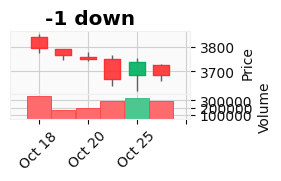

<Figure size 250x125 with 0 Axes>

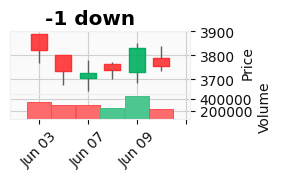

<Figure size 250x125 with 0 Axes>

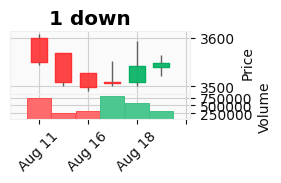

<Figure size 250x125 with 0 Axes>

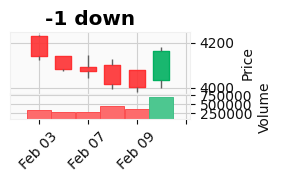

<Figure size 250x125 with 0 Axes>

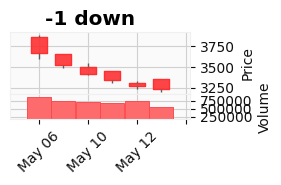

<Figure size 250x125 with 0 Axes>

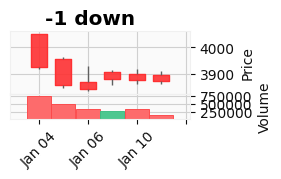

pattern 1 with children 6
[0.         0.87055139 0.97397915 0.94330527 0.45280586 0.99222222
 0.36428605 0.10323027 0.55174994 0.16666667 0.6622238  0.31700958
 0.38560516 0.10104746 0.90294981]


<Figure size 250x125 with 0 Axes>

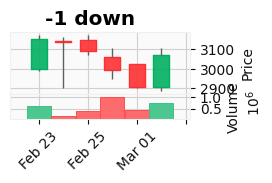

<Figure size 250x125 with 0 Axes>

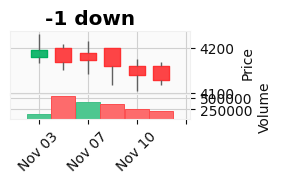

<Figure size 250x125 with 0 Axes>

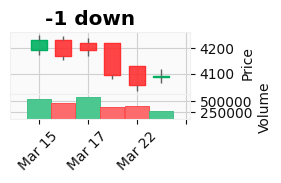

<Figure size 250x125 with 0 Axes>

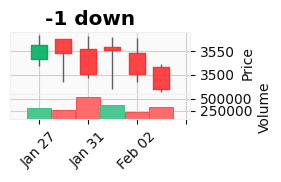

<Figure size 250x125 with 0 Axes>

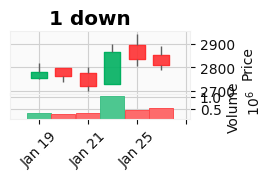

<Figure size 250x125 with 0 Axes>

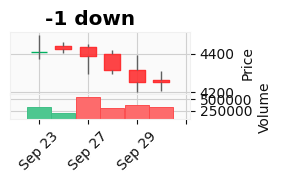

pattern 2 with children 6
[0.58201673 0.15289435 1.         1.         0.86074611 0.79744325
 1.         0.22462928 0.1305766  0.64887992 0.16666667 0.20586719
 0.11386452 0.16203485 0.        ]


<Figure size 250x125 with 0 Axes>

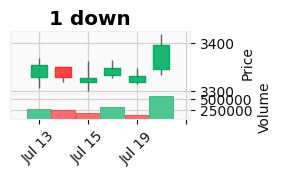

<Figure size 250x125 with 0 Axes>

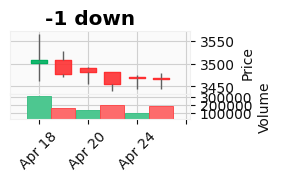

<Figure size 250x125 with 0 Axes>

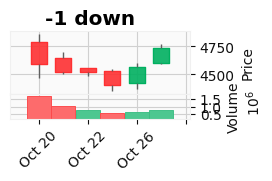

<Figure size 250x125 with 0 Axes>

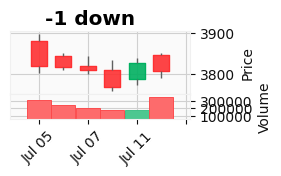

<Figure size 250x125 with 0 Axes>

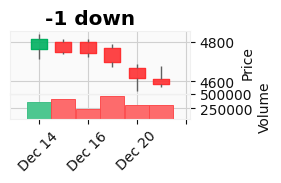

<Figure size 250x125 with 0 Axes>

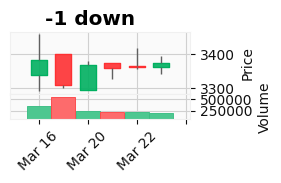

pattern 3 with children 7
[0.         0.         0.45626079 1.         1.         0.95345528
 0.90681601 0.9676815  0.32524863 0.55800462 0.70954636 0.90689723
 0.06214544 0.00521615 0.0316849 ]


<Figure size 250x125 with 0 Axes>

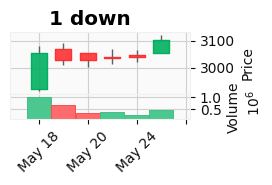

<Figure size 250x125 with 0 Axes>

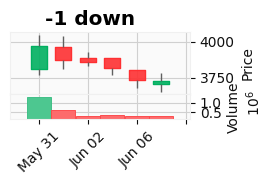

<Figure size 250x125 with 0 Axes>

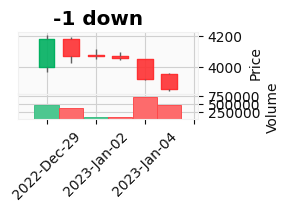

<Figure size 250x125 with 0 Axes>

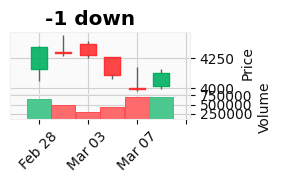

<Figure size 250x125 with 0 Axes>

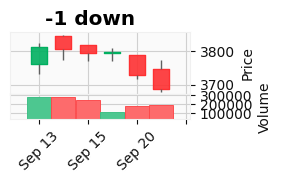

<Figure size 250x125 with 0 Axes>

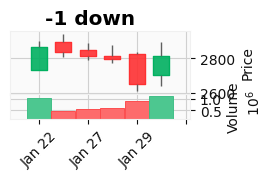

<Figure size 250x125 with 0 Axes>

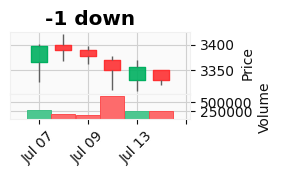

pattern 4 with children 6
[0.89519028 0.         0.08450033 0.         0.94675485 0.
 0.70225254 0.14428387 0.68136671 0.         0.78804052 0.89884998
 1.         0.81316635 0.43090158]


<Figure size 250x125 with 0 Axes>

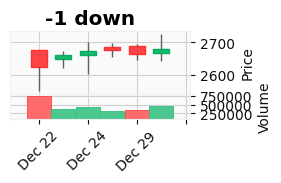

<Figure size 250x125 with 0 Axes>

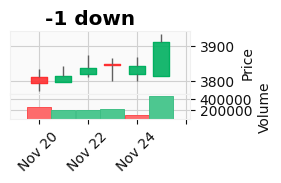

<Figure size 250x125 with 0 Axes>

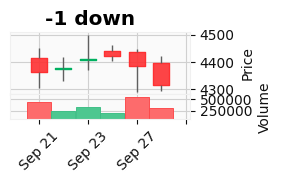

<Figure size 250x125 with 0 Axes>

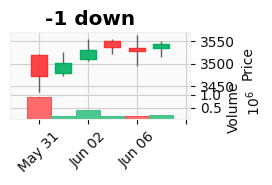

<Figure size 250x125 with 0 Axes>

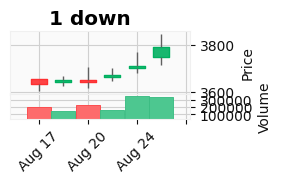

<Figure size 250x125 with 0 Axes>

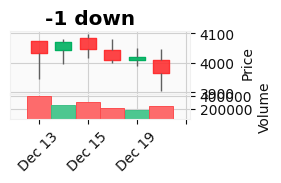

pattern 5 with children 6
[0.         0.         0.86497521 0.11184925 1.         0.67521417
 0.63296468 0.05083688 0.0933922  0.21924476 0.92660013 1.
 0.60263014 1.         0.12426335]


<Figure size 250x125 with 0 Axes>

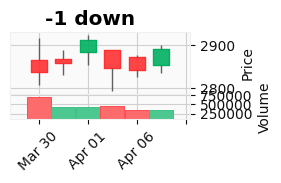

<Figure size 250x125 with 0 Axes>

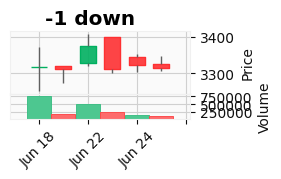

<Figure size 250x125 with 0 Axes>

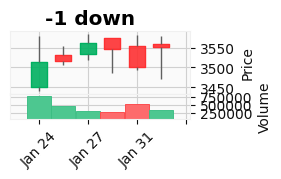

<Figure size 250x125 with 0 Axes>

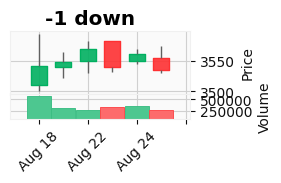

<Figure size 250x125 with 0 Axes>

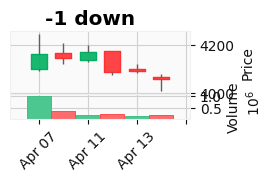

<Figure size 250x125 with 0 Axes>

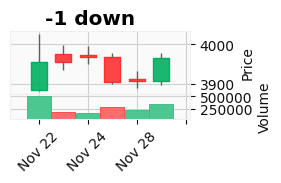

pattern 6 with children 7
[0.         0.06744854 0.88426447 0.20630469 1.         0.578755
 0.54254115 0.04357447 0.08005046 0.23787379 0.93708583 1.
 0.57105203 1.         0.10651144]


<Figure size 250x125 with 0 Axes>

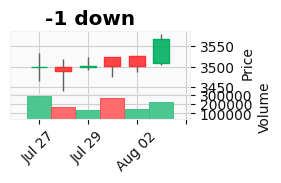

<Figure size 250x125 with 0 Axes>

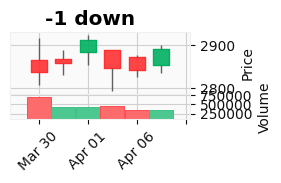

<Figure size 250x125 with 0 Axes>

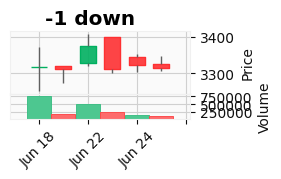

<Figure size 250x125 with 0 Axes>

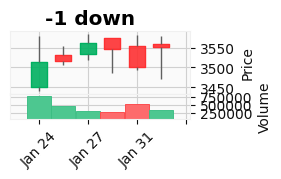

<Figure size 250x125 with 0 Axes>

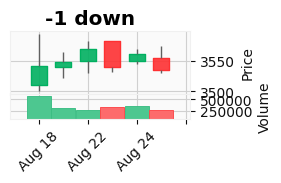

<Figure size 250x125 with 0 Axes>

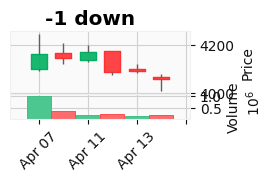

<Figure size 250x125 with 0 Axes>

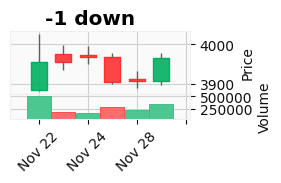

In [242]:
for key, val in all_patterns.items():
    for i,node in enumerate(val):
        print(f"pattern {i} with children {len(node.children)}")
        start = node.children[0].pattern
        for x in range(1,len(node.children)):
            start = np.add(start,node.children[x].pattern)
        print(start/len(node.children))
        for child in node.children:
            plot_pattern(child.i,stock_data,str(child.dir)+" "+key)

In [243]:
# calculate mean vector from list of pattern vector
def mean_vector(vectors):
    return np.sum(vectors, axis=0) / len(vectors)

In [244]:
# from sklearn.metrics.pairwise import cosine_similarity
def distance(a, b):
    a_min_b = a - b
    return np.sqrt(np.sum(a_min_b ** 2))
    # Reshape the vectors to ensure they are 2D arrays
    # vector1 = a.reshape(1, -1)
    # vector2 = b.reshape(1, -1)

    # # Compute cosine similarity
    # cosine_sim = cosine_similarity(vector1, vector2)
    # return cosine_sim[0,0]

In [245]:
mean_pat = {"up" : [], "down" : []}
for key, val in all_patterns.items():
    for i,node in enumerate(val):
        trend = 1 if key == "up" else -1
        pat = {}
        mean_vec = np.mean([stockPat for stockPat in node.children if stockPat.dir == trend], axis=0)
        pat["mean_vec"]=mean_vec
        print(f"______________=================== pattern {i} with children {len(node.children)} ================_______________")
        distances = np.array([distance(vec.pattern, mean_vec) for vec in node.children])
        std = np.std(distances)
        mean = np.mean(distances)
        pat["std"]=std
        pat["mean"]=mean
        pat["threshold"]=mean+std
        pat["total"] = 0
        pat["success"] = 0
        mean_pat[key].append(pat)
        for vec in node.children:
            
            # if distance(vec.pattern, mean_vec) > mean+std:
                print(distance(vec.pattern, mean_vec))
                # plot_pattern(vec.i,stock_data,str(vec.dir)+" "+key)
        # break
        

______________=================== pattern 0 with children 6 ================_______________
0.3168186132006992
0.2713303246946699
0.43904235544065856
0.2860448389170138
0.2935372938981941
0.31602946240908514
______________=================== pattern 1 with children 6 ================_______________
1.2314980306827736
1.1968125009624582
0.933243402720301
0.7278498236173537
0.8326631525592331
1.1289064616941042
______________=================== pattern 2 with children 6 ================_______________
0.9761419258687354
0.7370451724822925
0.7114413733606272
0.8362187492155041
1.1930178802969778
0.9109475211609577
______________=================== pattern 3 with children 7 ================_______________
0.5163693220828297
0.6913795647725768
0.8578238283858634
0.7123643904638042
0.6195797402763364
0.6631217558415134
0.4193886572781802
______________=================== pattern 4 with children 6 ================_______________
0.6107432686794725
0.4581288807615738
0.5424818435485692
0.32201

In [250]:
# patt_index = {}

patterns = []
threshold = 0.01
for i in range(len(stock_data)-6):
    
    cs_t_2 = getRelativeValues(i,stock_data)
    cs_t_1 = getRelativeValues(i+1,stock_data)
    cs_t = getRelativeValues(i+2,stock_data)
    relative_features = calculateMidpoints(i,i+1,i+2,stock_data)
    # check if any pattern is found. A pattern is found if the distance between the pattern is less than the mean pattern and its standard deviation.
    # test_vec = np.array([*cs_t_2,*cs_t_1,*cs_t,*relative_features])
    # test_vec = np.array([*relative_features])
    test_vec = get_candle_vector(i,3,stock_data)
    
    for key in  mean_pat.keys():
        for x,pat in enumerate(mean_pat[key]):
            if distance(pat["mean_vec"],test_vec) < pat["mean"] + pat["std"] *1.5:
                pat["total"]+=1
                # check if the market went up or down
                up = False
                down = False
                threshold = stock_data.iloc[i+2]['pct_change']
                checkForUpTrend = True
                checkForDownTrend = True
                # if x==2 :
                #     plot_pattern(i,stock_data,key)
                # check if any of the value of high in the range i+3 to i+6 is 3% greater than i+2 close #value
                for j in range(i+3, i+6):
                        lowerbound = stock_data.iloc[i+2]['Low'] - threshold
                        bottom_gap = stock_data.iloc[i+3]['Open'] - lowerbound
                        upperbound = stock_data.iloc[i+3]['Open'] + (bottom_gap * 1.5)
                        if checkForUpTrend and stock_data.iloc[j]['Low'] <= lowerbound:
                            checkForUpTrend = False
                        elif checkForUpTrend and  stock_data.iloc[j]['High'] >= upperbound:
                            up=True
                            checkForUpTrend = False
                            break
                for j in range(i+3, i+6):
                        upperbound = stock_data.iloc[i+2]['High'] + threshold
                        top_gap = upperbound - stock_data.iloc[i+3]['Open']
                        lowerbound = stock_data.iloc[i+3]['Open'] - (top_gap * 1.5)
                        if  checkForDownTrend and stock_data.iloc[j]['High'] >= upperbound:
                            checkForDownTrend = False
                        elif checkForDownTrend and stock_data.iloc[j]['Low'] <= lowerbound:
                            down = True
                            break
                if (up and key =="down") or (down and key == "up"):
                    if "unSuccess" not in pat : pat["unSuccess"] = 0
                    pat["unSuccess"]+=1
                if (up and key == "up") or (down and key == "down") :
                    pat["success"]+=1
                    break
                


In [251]:
mean_pat

{'up': [],
 'down': [{'mean_vec': array([1.        , 1.        , 1.        , 1.        , 1.        ,
          0.42644188, 0.2544326 , 0.18419716, 0.23838852, 0.18750397,
          0.        , 0.        , 0.01392326, 0.        , 0.07101934]),
   'std': 0.055404007809708056,
   'mean': 0.3204671480933868,
   'threshold': 0.37587115590309483,
   'total': 746,
   'success': 202},
  {'mean_vec': array([0.        , 0.84466167, 0.96877498, 0.93196633, 0.46873148,
          0.99066667, 0.27755102, 0.12387633, 0.5075006 , 0.2       ,
          0.70107132, 0.3804115 , 0.41466864, 0.12125695, 0.88353977]),
   'std': 0.1893119601179883,
   'mean': 1.0084955620393705,
   'threshold': 1.1978075221573588,
   'total': 588,
   'success': 22,
   'unSuccess': 1},
  {'mean_vec': array([0.62733758, 0.10399902, 1.        , 1.        , 0.83289534,
          0.7569319 , 1.        , 0.26955513, 0.14499344, 0.60303718,
          0.2       , 0.24704063, 0.00698953, 0.19444182, 0.        ]),
   'std': 0.16214563

In [ ]:
# patt_index = {}

def check_success(stock_data,mean_pat):
    for i in range(len(stock_data)-6):
        
        cs_t_2 = getRelativeValues(i,stock_data)
        cs_t_1 = getRelativeValues(i+1,stock_data)
        cs_t = getRelativeValues(i+2,stock_data)
        relative_features = calculateMidpoints(i,i+1,i+2,stock_data)
        # check if any pattern is found. A pattern is found if the distance between the pattern is less than the mean pattern and its standard deviation.
        # test_vec = np.array([*cs_t_2,*cs_t_1,*cs_t,*relative_features])
        # test_vec = np.array([*relative_features])
        test_vec = get_candle_vector(i,3,stock_data)
        
        for key in  mean_pat.keys():
            for x,pat in enumerate(mean_pat[key]):
                if distance(pat["mean_vec"],test_vec) < pat["mean"] + pat["std"] *1.5:
                    pat["total"]+=1
                    # check if the market went up or down
                    up = False
                    down = False
                    threshold = stock_data.iloc[i+2]['pct_change']
                    checkForUpTrend = True
                    checkForDownTrend = True
                    # if x==2 :
                    #     plot_pattern(i,stock_data,key)
                    # check if any of the value of high in the range i+3 to i+6 is 3% greater than i+2 close #value
                    for j in range(i+3, i+6):
                            lowerbound = stock_data.iloc[i+2]['Low'] - threshold
                            bottom_gap = stock_data.iloc[i+3]['Open'] - lowerbound
                            upperbound = stock_data.iloc[i+3]['Open'] + (bottom_gap * 1.5)
                            if checkForUpTrend and stock_data.iloc[j]['Low'] <= lowerbound:
                                checkForUpTrend = False
                            elif checkForUpTrend and  stock_data.iloc[j]['High'] >= upperbound:
                                up=True
                                checkForUpTrend = False
                                break
                    for j in range(i+3, i+6):
                            upperbound = stock_data.iloc[i+2]['High'] + threshold
                            top_gap = upperbound - stock_data.iloc[i+3]['Open']
                            lowerbound = stock_data.iloc[i+3]['Open'] - (top_gap * 1.5)
                            if  checkForDownTrend and stock_data.iloc[j]['High'] >= upperbound:
                                checkForDownTrend = False
                            elif checkForDownTrend and stock_data.iloc[j]['Low'] <= lowerbound:
                                down = True
                                break
        
                    if (up and key == "up") or (down and key == "down") :
                        pat["success"]+=1
                        break
                
